# Importação das Biblioecas

In [129]:
import pandas as pd
import seaborn as sns
import yfinance as yf
from sklearn.metrics import confusion_matrix, accuracy_score

# Importar os Dados

### Dados trimestrais

In [130]:
quarterly_reports = pd.read_csv("./../assets/dados.csv")
coluns_to_remove = list(filter(lambda colum: 'Unnamed' in colum, quarterly_reports.columns))
quarterly_reports = quarterly_reports.drop(columns=coluns_to_remove)
quarterly_reports[quarterly_reports.isna()] = 0
quarterly_reports.to_csv("./../assets/dados.csv")
ticker = pd.read_csv("./../assets/url.csv")['Nome'] + '11'
quarterly_reports['ticker'] = ticker
print(len(coluns_to_remove),coluns_to_remove)
quarterly_reports

1 ['Unnamed: 0']


,1.2.1 sum,1.2.1 mean,1.2.1 count,1.2.1 stdr,1.2.2 sum,1.2.2 mean,1.2.2 count,1.2.2 stdr,1.2.11 sum,1.2.11 mean,...,qualquer stdr,3.1.1 sum,3.1.1 mean,3.1.1 count,3.1.1 stdr,3.1.2 sum,3.1.2 mean,3.1.2 count,3.1.2 stdr,ticker
0,4183639.2,4183639.2,1.0,414180280.8,1.374460e+08,5.286383e+06,26.0,5.233519e+08,64210190.22,4.013137e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
1,4475406.0,4475406.0,1.0,443065194.0,1.567401e+08,5.805189e+06,27.0,5.747137e+08,73738202.72,4.915880e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
2,4688049.6,4688049.6,1.0,464116910.4,1.532604e+08,6.966381e+06,22.0,6.897587e+08,76949517.70,5.496394e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
3,4183639.2,4183639.2,1.0,414180280.8,1.374460e+08,5.286383e+06,26.0,5.233519e+08,64210190.22,4.013137e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
4,0.0,0.0,0.0,0.0,1.748127e+08,1.165418e+07,15.0,1.153764e+09,50223493.13,8.370582e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11
229,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11
230,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11
231,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11


In [131]:
data_ticker = pd.DataFrame()
for ticker in quarterly_reports['ticker'].unique():
    tag = ticker + ".SA"
    print(tag)
    temp_data_ticker = yf.download(tickers=tag, multi_level_index=False)
    temp_data_ticker['ticker'] = ticker
    data_ticker = pd.concat([data_ticker,temp_data_ticker])
data_ticker

AAZQ11.SA


[*********************100%***********************]  1 of 1 completed


AGRX11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AGRX11.SA']: YFInvalidPeriodError("AGRX11.SA: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


BBGO11.SA


[*********************100%***********************]  1 of 1 completed


CPTR11.SA


[*********************100%***********************]  1 of 1 completed


CRAA11.SA


[*********************100%***********************]  1 of 1 completed


DCRA11.SA


[*********************100%***********************]  1 of 1 completed


EGAF11.SA


[*********************100%***********************]  1 of 1 completed


FGAA11.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FLEM11.SA']: YFTzMissingError('possibly delisted; no timezone found')


FLEM11.SA
FZDB11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FZDB11.SA']: YFInvalidPeriodError("FZDB11.SA: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


GCRA11.SA


[*********************100%***********************]  1 of 1 completed


GRWA11.SA


[*********************100%***********************]  1 of 1 completed


HGAG11.SA


[*********************100%***********************]  1 of 1 completed


IAAG11.SA


[*********************100%***********************]  1 of 1 completed


IAGR11.SA


[*********************100%***********************]  1 of 1 completed


JGPX11.SA


[*********************100%***********************]  1 of 1 completed


KNCA11.SA


[*********************100%***********************]  1 of 1 completed


KOPA11.SA


[*********************100%***********************]  1 of 1 completed


LSAG11.SA


[*********************100%***********************]  1 of 1 completed


NCRA11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NCRA11.SA']: YFInvalidPeriodError("NCRA11.SA: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


OIAG11.SA


[*********************100%***********************]  1 of 1 completed


PLCA11.SA


[*********************100%***********************]  1 of 1 completed


RURA11.SA


[*********************100%***********************]  1 of 1 completed


RZAG11.SA


[*********************100%***********************]  1 of 1 completed


RZEO11.SA


[*********************100%***********************]  1 of 1 completed


SNAG11.SA


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume,ticker,Adj Close
Date,,,,,,,
2022-12-21,6.999203,7.013160,6.978268,6.978268,78854.0,AAZQ11,NaN
2022-12-22,6.978268,7.117833,6.629355,7.117833,31942.0,AAZQ11,NaN
2022-12-23,6.978268,6.978268,6.838703,6.978268,6389.0,AAZQ11,NaN
2022-12-26,6.964312,7.041073,6.873595,7.041073,38590.0,AAZQ11,NaN
2022-12-27,6.768921,6.964312,6.559573,6.964312,21828.0,AAZQ11,NaN
...,...,...,...,...,...,...,...
2025-04-07,9.480000,9.500000,9.320000,9.480000,0.0,SNAG11,NaN
2025-04-08,9.490000,9.600000,9.490000,9.570000,0.0,SNAG11,NaN
2025-04-09,9.490000,9.530000,9.430000,9.500000,0.0,SNAG11,NaN


In [132]:
data_ticker_label = data_ticker.reset_index()
data_ticker_label['Date'] = data_ticker_label['Date'].dt.to_period('M')
data_ticker_label = data_ticker_label.groupby(by=['ticker','Date']).var()
data_ticker_label = data_ticker_label.drop(columns=['Close','High','Low','Volume','Adj Close'])
data_ticker_label = data_ticker_label.reset_index()
data_ticker_label

,ticker,Date,Open
0,AAZQ11,2022-12,0.011244
1,AAZQ11,2023-01,0.014352
2,AAZQ11,2023-02,0.003305
3,AAZQ11,2023-03,0.001440
4,AAZQ11,2023-04,0.006627
...,...,...,...
682,SNAG11,2024-12,0.083056
683,SNAG11,2025-01,0.015242
684,SNAG11,2025-02,0.008161
685,SNAG11,2025-03,0.002656


In [133]:
data_ticker_label['Open'].describe()

count      683.000000
mean        34.071783
std        497.174803
min          0.000000
25%          0.007210
50%          0.076492
75%          0.651342
max      12317.899726
Name: Open, dtype: float64

<Axes: xlabel='Open'>

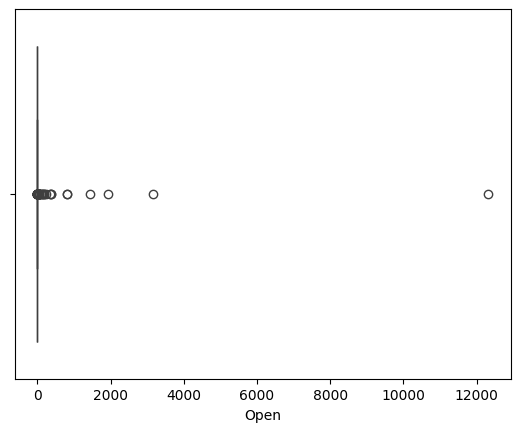

In [134]:
sns.boxplot(x=data_ticker_label['Open'])

<Axes: xlabel='Open'>

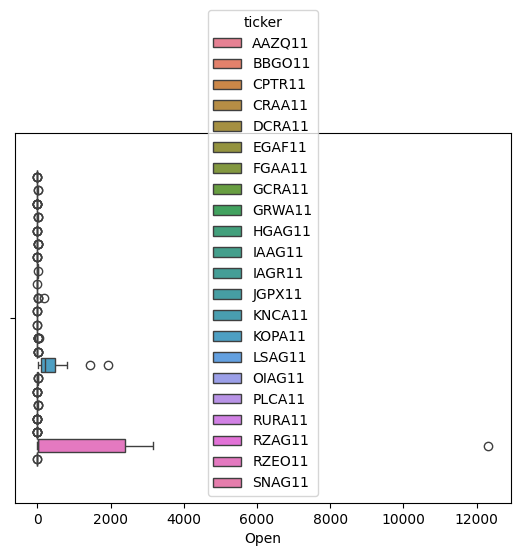

In [135]:
sns.boxplot(x=data_ticker_label['Open'],hue=data_ticker_label['ticker'])

<Axes: xlabel='Open', ylabel='Count'>

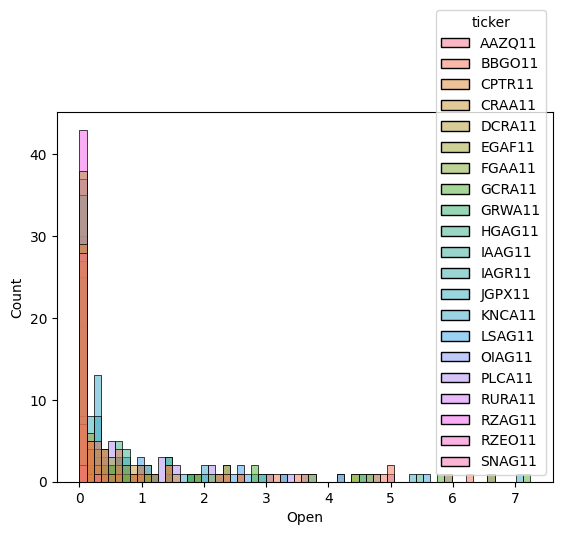

In [136]:
graph_data_ticker = data_ticker_label[data_ticker_label['Open'] < 8]
sns.histplot(x=graph_data_ticker['Open'], hue=graph_data_ticker['ticker'])

<Axes: xlabel='Open'>

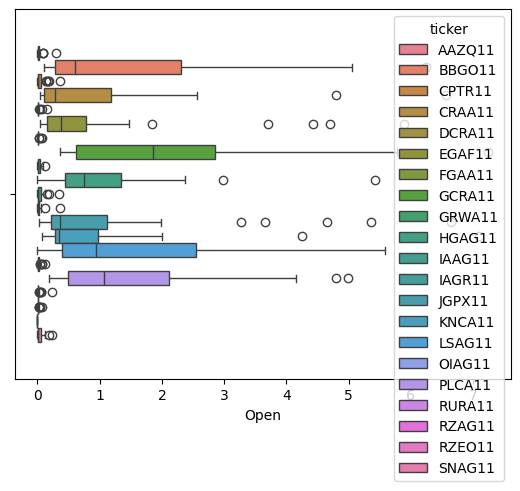

In [137]:
sns.boxplot(x=graph_data_ticker['Open'],hue=graph_data_ticker['ticker'])

In [138]:
data_ticker_label['ticker'].unique()

array(['AAZQ11', 'BBGO11', 'CPTR11', 'CRAA11', 'DCRA11', 'EGAF11',
       'FGAA11', 'GCRA11', 'GRWA11', 'HGAG11', 'IAAG11', 'IAGR11',
       'JGPX11', 'KNCA11', 'KOPA11', 'LSAG11', 'OIAG11', 'PLCA11',
       'RURA11', 'RZAG11', 'RZEO11', 'SNAG11'], dtype=object)

In [139]:
indice = yf.download(tickers=['XFIX11.SA'])

[*********************100%***********************]  1 of 1 completed


In [140]:
index = yf.download('XFIX11.SA',multi_level_index=False,).reset_index()
index['Date'] = index['Date'].dt.to_period('M')
index_variance = index.groupby(by='Date').var()
index_variance = index_variance.drop(columns=['Close','High','Low','Volume']).reset_index()
index_variance

[*********************100%***********************]  1 of 1 completed


,Date,Open
0,2021-01,0.000541
1,2021-02,0.001153
2,2021-03,0.008575
3,2021-04,0.001075
4,2021-05,0.000501
5,2021-06,0.023019
6,2021-07,0.014736
7,2021-08,0.020445
8,2021-09,0.006156
9,2021-10,0.018042


In [141]:
# pd.merge(left=)
index_variance.columns = ['Date','index']
index_variance

,Date,index
0,2021-01,0.000541
1,2021-02,0.001153
2,2021-03,0.008575
3,2021-04,0.001075
4,2021-05,0.000501
5,2021-06,0.023019
6,2021-07,0.014736
7,2021-08,0.020445
8,2021-09,0.006156
9,2021-10,0.018042


In [142]:
marge_index = pd.merge(index_variance,data_ticker_label,on=['Date'])
marge_index

,Date,index,ticker,Open
0,2021-10,0.018042,RZAG11,0.008141
1,2021-11,0.026989,JGPX11,0.022773
2,2021-11,0.026989,RZAG11,0.024099
3,2021-12,0.076505,JGPX11,1.765862
4,2021-12,0.076505,RZAG11,0.015958
...,...,...,...,...
682,2025-04,0.010800,OIAG11,0.043014
683,2025-04,0.010800,PLCA11,2.128902
684,2025-04,0.010800,RURA11,0.014311
685,2025-04,0.010800,RZAG11,0.008550


In [143]:
marge_index.dropna()

,Date,index,ticker,Open
0,2021-10,0.018042,RZAG11,0.008141
1,2021-11,0.026989,JGPX11,0.022773
2,2021-11,0.026989,RZAG11,0.024099
3,2021-12,0.076505,JGPX11,1.765862
4,2021-12,0.076505,RZAG11,0.015958
...,...,...,...,...
682,2025-04,0.010800,OIAG11,0.043014
683,2025-04,0.010800,PLCA11,2.128902
684,2025-04,0.010800,RURA11,0.014311
685,2025-04,0.010800,RZAG11,0.008550


In [144]:
marge_index['Beta'] = marge_index['Open'] - marge_index['index']
marge_index['Label'] = marge_index['Beta'] + marge_index['Open']

marge_index.dropna()

,Date,index,ticker,Open,Beta,Label
0,2021-10,0.018042,RZAG11,0.008141,-0.009901,-0.001761
1,2021-11,0.026989,JGPX11,0.022773,-0.004217,0.018556
2,2021-11,0.026989,RZAG11,0.024099,-0.002890,0.021209
3,2021-12,0.076505,JGPX11,1.765862,1.689357,3.455219
4,2021-12,0.076505,RZAG11,0.015958,-0.060547,-0.044589
...,...,...,...,...,...,...
682,2025-04,0.010800,OIAG11,0.043014,0.032214,0.075228
683,2025-04,0.010800,PLCA11,2.128902,2.118102,4.247004
684,2025-04,0.010800,RURA11,0.014311,0.003511,0.017822
685,2025-04,0.010800,RZAG11,0.008550,-0.002250,0.006300


In [145]:
marge_index['Label'].describe()

count      683.000000
mean        68.128049
std        994.349805
min         -0.052785
25%          0.004313
50%          0.134170
75%          1.292705
max      24635.792532
Name: Label, dtype: float64

In [146]:
marge_index.loc[marge_index['Label'].isna()]

,Date,index,ticker,Open,Beta,Label
27,2022-04,0.004089,LSAG11,NaN,NaN,NaN
578,2024-11,0.010070,RZEO11,NaN,NaN,NaN
642,2025-02,0.027763,RZEO11,NaN,NaN,NaN
664,2025-03,0.044914,RZEO11,NaN,NaN,NaN


<Axes: xlabel='Label', ylabel='Count'>

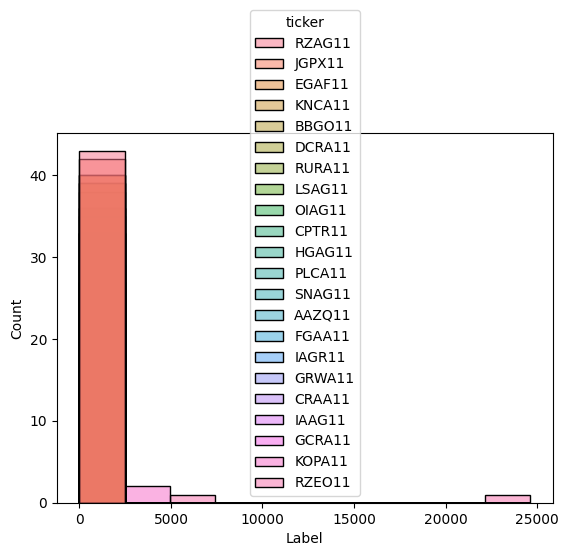

In [147]:
sns.histplot(x=marge_index['Label'],bins=10, hue=marge_index['ticker'])

In [148]:
cut_label = pd.qcut(marge_index['Label'],2)

<Axes: xlabel='Label'>

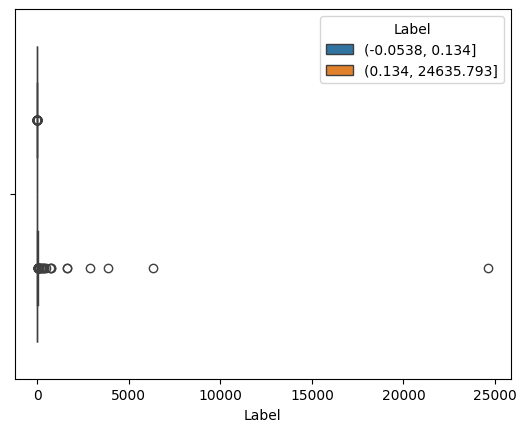

In [149]:
sns.boxplot(x=marge_index['Label'], hue=cut_label)

In [150]:
marge_index['Beta'].describe()

count      683.000000
mean        34.056266
std        497.175002
min         -0.064497
25%         -0.000420
50%          0.061459
75%          0.635603
max      12317.892806
Name: Beta, dtype: float64

In [151]:
rotulo = marge_index.drop(columns=['index','Open','Beta'])

### Dados de Mudanças de preços

### Dados mensais

In [152]:
mensal = pd.read_csv('./../assets/mes_data.csv')

# mensal['Data da Informação sobre detalhamento do número de cotistas¹']
mensal['Data'] = pd.to_datetime(mensal['Data da Informação sobre detalhamento do número de cotistas¹'],dayfirst=True,errors='coerce')
mensal.drop(columns=['Data da Informação sobre detalhamento do número de cotistas¹'])

,Unnamed: 0,ticker,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Total dos Passivos,Valor total dos imóveis objeto de ônus reais,Valor total das garantias prestadas com operacões da classe,"Valor total das garantias prestadas com operações de cotistas (art. 32, § 3º, Anexo normativo III)",Cédulas de Debêntures,Total do passivo,Certificado de Recebíveis Imobiliários (CRI),Letras de Crédito Imobiliário (LCI),Data,Ano_Quarter
0,0,AAZQ,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,"2.527.467,07","0,00","0,00","0,00",0,0,0,0,2024-09-30,2024.0-3.0
1,1,AAZQ,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,"2.533.303,79","0,00","0,00","0,00",0,0,0,0,2024-08-30,2024.0-3.0
2,2,AAZQ,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.538.706,75",0,0,2024-07-31,2024.0-3.0
3,3,AAZQ,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,0,0,0,0,"0,00","2.865.231,42",0,0,2024-06-28,2024.0-2.0
4,4,AAZQ,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.927.667,16",0,0,2024-05-31,2024.0-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,888,XPCA,8.496,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.177.102,20","0,00","0,00",2022-04-29,2022.0-2.0
889,889,XPCA,6.546,6.498,47.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,"0,00","2.139.190,07","0,00","0,00",2022-03-31,2022.0-1.0
890,890,XPCA,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.705.675,01","4.366.443,47","0,00",2022-02-25,2022.0-1.0
891,891,XPCA,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.524.411,38","7.057.364,03","0,00",2022-01-31,2022.0-1.0


# Fazer o rôtulo
Variação
Beta = Varição do ativo / Variação do indice
Rótulo = Beta * Variação * Resultado do próximo quarter(trimestre)

In [153]:
mensal['Ano_Quarter'] = mensal['Data'].dt.strftime('%Y') + '-' + mensal['Data'].dt.quarter.astype(str)
mensal['Ano_Quarter'] = mensal['Ano_Quarter'].str[:-2]
mensal['Ano_Quarter']


0      2024-3
1      2024-3
2      2024-3
3      2024-2
4      2024-2
        ...  
888    2022-2
889    2022-1
890    2022-1
891    2022-1
892    2021-4
Name: Ano_Quarter, Length: 893, dtype: object

### Remover colunas Unnamed de mensal e trmestral

In [154]:
mensal[mensal.isna()] = 0
mensal

/tmp/ipykernel_3305/3613130871.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  mensal[mensal.isna()] = 0


,Unnamed: 0,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,...,Total dos Passivos,Valor total dos imóveis objeto de ônus reais,Valor total das garantias prestadas com operacões da classe,"Valor total das garantias prestadas com operações de cotistas (art. 32, § 3º, Anexo normativo III)",Cédulas de Debêntures,Total do passivo,Certificado de Recebíveis Imobiliários (CRI),Letras de Crédito Imobiliário (LCI),Data,Ano_Quarter
0,0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,...,"2.527.467,07","0,00","0,00","0,00",0,0,0,0,2024-09-30 00:00:00,2024-3
1,1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,...,"2.533.303,79","0,00","0,00","0,00",0,0,0,0,2024-08-30 00:00:00,2024-3
2,2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.538.706,75",0,0,2024-07-31 00:00:00,2024-3
3,3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,...,0,0,0,0,"0,00","2.865.231,42",0,0,2024-06-28 00:00:00,2024-2
4,4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.927.667,16",0,0,2024-05-31 00:00:00,2024-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,888,XPCA,29/04/2022,8.496,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.177.102,20","0,00","0,00",2022-04-29 00:00:00,2022-2
889,889,XPCA,31/03/2022,6.546,6.498,47.0,0.0,0.0,0.0,1.0,...,0,0,0,0,"0,00","2.139.190,07","0,00","0,00",2022-03-31 00:00:00,2022-1
890,890,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.705.675,01","4.366.443,47","0,00",2022-02-25 00:00:00,2022-1
891,891,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.524.411,38","7.057.364,03","0,00",2022-01-31 00:00:00,2022-1


In [155]:
mensal['Dividend Yield do Mês de Referência³ (%)']

0      1.0926
1      1.0933
2      1.0945
3      1.1660
4      1.1655
        ...  
888    1.4666
889    1.4620
890    1.1514
891    1.0461
892    0.8371
Name: Dividend Yield do Mês de Referência³ (%), Length: 893, dtype: float64

In [156]:
# mensal.to_csv('../assets/mes_data.csv')
# for column in mensal.columns.tolist():
#     print(colum)
#     if colum not in ['Mount','Dividend Yield do Mês de Referência³ (%)']:
#         print(colum)
#         mensal[colum] = mensal[colum].astype(str).replace(".","").replace(',','.')
mensal.columns.tolist()

['Unnamed: 0',
 'ticker',
 'Data da Informação sobre detalhamento do número de cotistas¹',
 'Número de cotistas',
 'Pessoa física',
 'Pessoa jurídica não financeira',
 'Banco comercial',
 'Corretora ou distribuidora',
 'Outras pessoas jurídicas financeiras',
 'Investidores não residentes',
 'Entidade aberta de previdência complementar',
 'Entidade fechada de previdência complementar',
 'Regime próprio de previdência dos servidores públicos',
 'Sociedade seguradora ou resseguradora',
 'Sociedade de capitalização e de arrendamento mercantil',
 'Fundos de investimento imobiliário',
 'Outros fundos de investimento',
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)',
 'Outros tipos de cotistas não relacionados',
 'Ativo – R$',
 'Patrimônio Líquido – R$',
 'Número de Cotas Emitidas',
 'Valor Patrimonial das Cotas – R$',
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)',
 'Despesas com o agente custodiante em relação ao patrimônio líquid

In [157]:
trimestre = pd.read_csv('../assets/dados1.csv')
trimestre

,Unnamed: 0,NomedoFundo:,CNPJdoFundo:,DatadeFuncionamento:,PúblicoAlvo:,CódigoISIN:,Quantidadedecotasemitidas:,FundoExclusivo?,Cotistaspossuemvínculofamiliarousocietáriofamiliar?,Classificaçãoautorregulação:,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN
0,0,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
1,1,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,8.653422e+09,-5.747045e+08,2.906377e+09,1077649.0,8.029909e+08,7.628413e+09,0.0,0.0,0.0,0.0
2,2,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,1.730684e+10,-1.730684e+09,2.000000e+00,965479.0,1.792566e+09,1.702938e+10,0.0,0.0,0.0,0.0
3,3,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,8.653422e+10,-8.653422e+08,3.500000e+01,1177336.0,7.350000e+08,6.982500e+10,0.0,0.0,0.0,0.0
4,4,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,1.922983e+11,-1.922983e+08,3.500000e+01,992625.0,1.937271e+09,1.840408e+11,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"21.475.895,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,7.430380e+09,-7.430380e+08,4.000000e+00,1111614.0,6.684318e+08,6.350102e+09,0.0,0.0,0.0,0.0
308,308,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"15.885.723,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,0.0,0.0
309,309,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
310,310,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0


In [158]:
for i in trimestre.columns:
    print(i)

Unnamed: 0
NomedoFundo:
CNPJdoFundo:
DatadeFuncionamento:
PúblicoAlvo:
CódigoISIN:
Quantidadedecotasemitidas:
FundoExclusivo?
Cotistaspossuemvínculofamiliarousocietáriofamiliar?
Classificaçãoautorregulação:
PrazodeDuração:
DatadoPrazodeDuração:
Encerramentodoexercíciosocial:
Mercadodenegociaçãodascotas:
Entidadeadministradorademercadoorganizado:
NomedoAdministrador:
CNPJdoAdministrador:
Endereço:
Telefones:
Site:
E-mail:
Competência:
DatadeEncerramentodoTrimestre:
OFundoseenquadranadefiniçãodanota"6":
Resultadocontábil/financeirotrimestrallíquido_financeiro
Resultadocontábil/financeirotrimestrallíquido_contabil
(-)Taxadeadministração_financeiro
(-)Taxadeadministração_contabil
(-)Taxadedesempenho(performance)_financeiro
(-)Taxadedesempenho(performance)_contabil
(-)Consultoriaespecializadadequetrataoart.31,II,ICVM472_financeiro
(-)Consultoriaespecializadadequetrataoart.31,II,ICVM472_contabil
(-)Empresaespecializadadequetrataoart.31,III,ICVM472_financeiro
(-)Empresaespecializadadequetrata

In [159]:
# trimestre['DatadeEncerramentodoTrimestre:'] = pd.to_datetime(trimestre['DatadeEncerramentodoTrimestre:'])
# trimestre['DatadeFuncionamento:'] = pd.to_datetime(trimestre['DatadeFuncionamento:'])
# trimestre.to_csv('../assets/dados1.csv')


In [160]:
str(trimestre['NomedoFundo:'].unique().tolist())

"['AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO', 'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISEXESARAGUAIA-FIAGRO-IMOBILIÁRIO', 'BBFUNDODEINVESTIMENTODECRÉDITOFIAGRO-IMOBILIÁRIO', 'CAPITANIAAGROSTRATEGIES-FIAGRO-IMOBILIÁRIO', 'SPARTAFIAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO', 'DEVANTFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'ECOAGROIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'FG/AGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', '051AGROFAZENDASIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIARIO', '051AGROFAZENDASIIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOB', 'GALAPAGOSRECEBÍVEISDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO', 'GREENWICHAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'HIGHFUNDODEINVESTIMENTOAGRO-FIAGRO-IMOBILIÁRIO', 'INTERAMERRA-FIA

In [161]:
dict_nome_ticker= {
    'AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'AAZQ', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISEXESARAGUAIA-FIAGRO-IMOBILIÁRIO': 'AGRX', 
    'BBFUNDODEINVESTIMENTODECRÉDITOFIAGRO-IMOBILIÁRIO': 'BBGO', 
    'CAPITANIAAGROSTRATEGIES-FIAGRO-IMOBILIÁRIO': 'CPTR', 
    'SPARTAFIAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO': 'CRAA', 
    'DEVANTFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'DCRA', 
    'ECOAGROIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'EGAF', 
    'FG/AGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'FGAA', 
    '051AGROFAZENDASIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIARIO': 'FLEM', 
    '051AGROFAZENDASIIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOB': 'FZDA', 
    'GALAPAGOSRECEBÍVEISDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'GCRA', 
    'GREENWICHAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'GRWA', 
    'HIGHFUNDODEINVESTIMENTOAGRO-FIAGRO-IMOBILIÁRIO': 'HGAG', 
    'INTERAMERRA-FIAGRO-IMOBILIÁRIO': 'IAAG', 
    'SFIINVESTIMENTOSDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'IAGR', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISJGPCRÉDITO-FIAGRO-IMOBILIÁRIO': 'JGPX', 
    'KINEACRÉDITOAGROFIAGRO-IMOBILIÁRIO': 'KNCA', 
    'KINEAOPORTUNIDADESAGROIFIAGRO-IMOBILIÁRIO': 'KOPA', 
    'LESTEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'KOPA', 
    'NCHRECEBÍVEISDOAGRONEGÓCIO-FIAGROIMOBILIÁRIO': 'NCRA', 
    'NCHEQIRECEBÍVEISDOAGRONEGÓCIO-FIAGROIMOBILIÁRIO': 'NCRA', 
    'OURINVESTINNOVATION-FIAGROIMOBILIÁRIO': 'OIAG', 
    'PLURALBRBCRÉDITOAGRO-FIAGRO-IMOBILIÁRIO': 'PLCA', 
    'ITAÚASSETRURALFIAGRO-IMOBILIÁRIO': 'RURA', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISRIZAAGRO-FIAGRO-IMOBILIÁRIO': 'RZAG', 
    'RIZAEOSFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIÁRIO': 'RZEO', 
    'SUNOAGRO-FIAGRO-IMOBILIÁRIO': 'SNAG', 
    'VECTISDATAGROCRÉDITOAGRONEGÓCIO-FINASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO': 'VCRA', 
    'VALORACRAFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'VGIA', 
    'XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISIMOB.-FIAGRO-IMOB.': 'XPCA'
}

In [162]:
trimestre['ticker'] = trimestre['NomedoFundo:'].apply(lambda x: dict_nome_ticker.get(x))
trimestre['ticker'] 

0      AAZQ
1      AAZQ
2      AAZQ
3      AAZQ
4      AAZQ
       ... 
307    XPCA
308    XPCA
309    XPCA
310    XPCA
311    XPCA
Name: ticker, Length: 312, dtype: object

In [163]:
mensal.ticker

0      AAZQ
1      AAZQ
2      AAZQ
3      AAZQ
4      AAZQ
       ... 
888    XPCA
889    XPCA
890    XPCA
891    XPCA
892    XPCA
Name: ticker, Length: 893, dtype: object

In [164]:
trimestre['DatadeEncerramentodoTrimestre:'] = pd.to_datetime(trimestre['DatadeEncerramentodoTrimestre:'])
trimestre['Ano_Quarter'] = trimestre['DatadeEncerramentodoTrimestre:'].dt.year.astype(str) + "-" + trimestre['DatadeEncerramentodoTrimestre:'].dt.quarter.astype(str) 
# mensal['Ano_Quarter']
trimestre

,Unnamed: 0,NomedoFundo:,CNPJdoFundo:,DatadeFuncionamento:,PúblicoAlvo:,CódigoISIN:,Quantidadedecotasemitidas:,FundoExclusivo?,Cotistaspossuemvínculofamiliarousocietáriofamiliar?,Classificaçãoautorregulação:,...,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN,ticker,Ano_Quarter
0,0,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0,AAZQ,2024-2
1,1,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,2.906377e+09,1077649.0,8.029909e+08,7.628413e+09,0.0,0.0,0.0,0.0,AAZQ,2024-1
2,2,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,2.000000e+00,965479.0,1.792566e+09,1.702938e+10,0.0,0.0,0.0,0.0,AAZQ,2023-4
3,3,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,3.500000e+01,1177336.0,7.350000e+08,6.982500e+10,0.0,0.0,0.0,0.0,AAZQ,2023-3
4,4,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,3.500000e+01,992625.0,1.937271e+09,1.840408e+11,0.0,0.0,0.0,0.0,AAZQ,2023-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"21.475.895,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,4.000000e+00,1111614.0,6.684318e+08,6.350102e+09,0.0,0.0,0.0,0.0,XPCA,2022-3
308,308,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"15.885.723,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,0.0,0.0,XPCA,2022-2
309,309,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0,XPCA,2022-1
310,310,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0,XPCA,2022-1


In [165]:
trimestre['Ano_Quarter']

0      2024-2
1      2024-1
2      2023-4
3      2023-3
4      2023-2
        ...  
307    2022-3
308    2022-2
309    2022-1
310    2022-1
311    2021-4
Name: Ano_Quarter, Length: 312, dtype: object

In [166]:
mensal['Ano_Quarter']

0      2024-3
1      2024-3
2      2024-3
3      2024-2
4      2024-2
        ...  
888    2022-2
889    2022-1
890    2022-1
891    2022-1
892    2021-4
Name: Ano_Quarter, Length: 893, dtype: object

In [167]:
final = pd.merge(mensal,trimestre,'left',on=['Ano_Quarter','ticker'])
final

,Unnamed: 0_x,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN
0,0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
4,4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,890,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1067,890,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1068,891,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1069,891,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0


In [168]:
final_date = pd.to_datetime(final['Data da Informação sobre detalhamento do número de cotistas¹'],'coerce')
final['Date'] = final_date.dt.to_period('M')
final['Date']

/tmp/ipykernel_3305/2064336292.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_date = pd.to_datetime(final['Data da Informação sobre detalhamento do número de cotistas¹'],'coerce')


0       2024-09
1       2024-08
2       2024-07
3       2024-06
4       2024-05
         ...   
1066    2022-02
1067    2022-02
1068    2022-01
1069    2022-01
1070    2021-12
Name: Date, Length: 1071, dtype: period[M]

In [169]:
columns_to_drop = list(filter(lambda column: 'Unnamed' in column,final.columns))
columns_to_drop.append('NaN')
columns_to_drop.append('0')
final = final.drop(columns=columns_to_drop)
final


,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date
0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09
1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08
2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07
3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06
4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1067,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1068,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01
1069,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01


In [170]:
final.drop_duplicates(subset=['ticker','Date'])

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date
0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09
1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08
2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07
3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06
4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,XPCA,29/04/2022,8.496,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,172377091.0,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,2022-04
1064,XPCA,31/03/2022,6.546,6.498,47.0,0.0,0.0,0.0,1.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-03
1066,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1068,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01


In [171]:
final.to_csv('../assets/final.csv')

In [172]:
final.shape

(1071, 204)

In [173]:
final[final.isna()] = 0

/tmp/ipykernel_3305/3945899940.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  final[final.isna()] = 0
/tmp/ipykernel_3305/3945899940.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with period[M], please explicitly cast to a compatible dtype first.
  final[final.isna()] = 0


In [174]:
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date
0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09
1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08
2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07
3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06
4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1067,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1068,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01
1069,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01


In [175]:
final.drop_duplicates(subset=['ticker','Data da Informação sobre detalhamento do número de cotistas¹'])

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date
0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09
1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08
2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07
3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06
4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,XPCA,29/04/2022,8.496,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,172377091.0,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,2022-04
1064,XPCA,31/03/2022,6.546,6.498,47.0,0.0,0.0,0.0,1.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-03
1066,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1068,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01


Juntar final com label

In [176]:
final.columns 

Index(['ticker',
       'Data da Informação sobre detalhamento do número de cotistas¹',
       'Número de cotistas', 'Pessoa física', 'Pessoa jurídica não financeira',
       'Banco comercial', 'Corretora ou distribuidora',
       'Outras pessoas jurídicas financeiras', 'Investidores não residentes',
       'Entidade aberta de previdência complementar',
       ...
       ' (+) Resultado financeiro que excede o mínimo de 95%⁷.',
       ' Rendimentos declarados',
       ' (-) Rendimentos pagos antecipadamente durante o trimestre/semestre',
       ' Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre',
       ' % do resultado financeiro líquido declarado no trimestre/semestre',
       ' Resultado financeiro líquido acumulado no trimestre/semestre corrente',
       ' 95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)',
       ' (+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.',
       ' (-) Parce

In [177]:
final['ticker'] = final['ticker'] + '11'

In [178]:
# final['Data'] = final['Data'].dt.to_period('M')
final['Date'] = pd.to_datetime(final['Data']).dt.to_period('M')
rotulo['Date']

0      2021-10
1      2021-11
2      2021-11
3      2021-12
4      2021-12
        ...   
682    2025-04
683    2025-04
684    2025-04
685    2025-04
686    2025-04
Name: Date, Length: 687, dtype: period[M]

In [179]:
len(final['ticker'].unique())

29

In [180]:
len(rotulo['ticker'].unique())

22

In [184]:
rotulo

,Date,ticker,Label
0,2021-10,RZAG11,-0.001761
1,2021-11,JGPX11,0.018556
2,2021-11,RZAG11,0.021209
3,2021-12,JGPX11,3.455219
4,2021-12,RZAG11,-0.044589
...,...,...,...
682,2025-04,OIAG11,0.075228
683,2025-04,PLCA11,4.247004
684,2025-04,RURA11,0.017822
685,2025-04,RZAG11,0.006300


In [181]:
final = pd.merge(final,rotulo,on=['Date','ticker'])

In [183]:
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date,Label
0,AAZQ11,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09,0.081022
1,AAZQ11,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08,0.020119
2,AAZQ11,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07,0.179444
3,AAZQ11,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06,0.600362
4,AAZQ11,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05,0.038238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,SNAG11,30/11/2022,25.673,25.632,39.0,0.0,0.0,0.0,0.0,0.0,...,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,2022-11,0.022511
669,SNAG11,31/10/2022,23.197,23.161,34.0,0.0,0.0,0.0,0.0,0.0,...,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,2022-10,0.197171
670,SNAG11,31/10/2022,23.197,23.161,34.0,0.0,0.0,0.0,0.0,0.0,...,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,2022-10,0.197171
671,SNAG11,30/09/2022,15.021,14.994,25.0,0.0,0.0,0.0,0.0,0.0,...,2.603724e+09,-9.000000e+05,1.703724e+09,950000.0,2.740762e+08,2.603724e+09,0.0,0.0,2022-09,0.004281


In [186]:
final['Label'].unique()

array([ 8.10216948e-02,  2.01192797e-02,  1.79443617e-01,  6.00362205e-01,
        3.82383039e-02, -4.02202180e-03,  1.50030426e-03,  4.17936338e-03,
        1.72078451e-02,  1.47118688e-02, -5.75191695e-04, -2.63387192e-04,
        8.04117202e-04,  4.21886977e-03,  1.20395821e-02, -1.61874457e-02,
       -3.54522896e-02,  3.35044543e-03, -4.49862516e-03,  3.05014280e-03,
        2.29459637e-02, -1.25074475e-04,  1.01058100e+01,  2.92740800e+00,
        1.16291264e+00,  2.75891474e+00,  3.77038777e-01,  5.25183190e-01,
        5.40670320e-01,  8.02109989e-01,  7.33876342e-01,  1.23508336e+00,
        5.93516666e-01,  2.02079557e+00,  5.21118313e-01,  7.54570793e-01,
        1.24177017e+00,  2.41799600e+00,  4.63113284e+00,  5.83330681e-01,
        2.14565661e-01,  3.09295735e-01,  4.48822939e-01,  5.11604126e+00,
        3.88491642e-01,  1.95724046e-01,  1.15231456e+00,  7.37008174e-01,
        1.70696719e+00,  4.54710504e-01,  1.04099793e+00,  1.87351174e+00,
        6.12002475e+00,  

Removendo duplicacatas

In [189]:
Unnamed_column = filter(lambda column: 'Unnamed' in column, final.columns)
final = final.drop(columns=Unnamed_column)
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date,Label
0,AAZQ11,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09,0.081022
1,AAZQ11,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08,0.020119
2,AAZQ11,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07,0.179444
3,AAZQ11,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06,0.600362
4,AAZQ11,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05,0.038238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,SNAG11,30/11/2022,25.673,25.632,39.0,0.0,0.0,0.0,0.0,0.0,...,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,2022-11,0.022511
669,SNAG11,31/10/2022,23.197,23.161,34.0,0.0,0.0,0.0,0.0,0.0,...,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,2022-10,0.197171
670,SNAG11,31/10/2022,23.197,23.161,34.0,0.0,0.0,0.0,0.0,0.0,...,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,2022-10,0.197171
671,SNAG11,30/09/2022,15.021,14.994,25.0,0.0,0.0,0.0,0.0,0.0,...,2.603724e+09,-9.000000e+05,1.703724e+09,950000.0,2.740762e+08,2.603724e+09,0.0,0.0,2022-09,0.004281


In [190]:
final = final.drop_duplicates(subset=['Data da Informação sobre detalhamento do número de cotistas¹','ticker'])
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date,Label
0,AAZQ11,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09,0.081022
1,AAZQ11,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08,0.020119
2,AAZQ11,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07,0.179444
3,AAZQ11,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06,0.600362
4,AAZQ11,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05,0.038238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,SNAG11,28/02/2023,34.942,34.902,39.0,0.0,0.0,0.0,0.0,0.0,...,1.038000e+11,-6.780000e+06,3.600000e+10,963114.0,1.077754e+09,1.023866e+11,0.0,0.0,2023-02,0.129282
667,SNAG11,30/11/2022,25.673,25.632,39.0,0.0,0.0,0.0,0.0,0.0,...,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,2022-11,0.022511
669,SNAG11,31/10/2022,23.197,23.161,34.0,0.0,0.0,0.0,0.0,0.0,...,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,2022-10,0.197171
671,SNAG11,30/09/2022,15.021,14.994,25.0,0.0,0.0,0.0,0.0,0.0,...,2.603724e+09,-9.000000e+05,1.703724e+09,950000.0,2.740762e+08,2.603724e+09,0.0,0.0,2022-09,0.004281


Removendo dados categoricos

In [191]:
final = final.select_dtypes(include=['number'])
final

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label
0,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.081022
1,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.020119
2,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.179444
3,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.600362
4,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.038238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,34.942,34.902,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14133906.0,1.038000e+11,-6.780000e+06,3.600000e+10,963114.0,1.077754e+09,1.023866e+11,0.0,0.0,0.129282
667,25.673,25.632,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40680431.0,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,0.022511
669,23.197,23.161,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40680431.0,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,0.197171
671,15.021,14.994,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.603724e+09,-9.000000e+05,1.703724e+09,950000.0,2.740762e+08,2.603724e+09,0.0,0.0,0.004281


In [192]:
size = len(final)
size

525

In [194]:
final['Label'].describe()

count      524.000000
mean        65.014497
std       1111.243487
min         -0.044589
25%          0.003718
50%          0.128399
75%          0.920532
max      24635.792532
Name: Label, dtype: float64

In [196]:
def remove_outliers(df, coluna):
    # Calcula os quartis
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    # Define os limites inferior e superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtra os dados que estão dentro dos limites
    df_filtrado = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    return df_filtrado

final = remove_outliers(final, 'Label')
print("Dados originais:")
final

Dados originais:


,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label
0,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.081022
1,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.020119
2,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.179444
3,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.600362
4,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.038238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,34.942,34.902,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14133906.0,1.038000e+11,-6.780000e+06,3.600000e+10,963114.0,1.077754e+09,1.023866e+11,0.0,0.0,0.129282
667,25.673,25.632,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40680431.0,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,0.022511
669,23.197,23.161,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40680431.0,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,0.197171
671,15.021,14.994,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.603724e+09,-9.000000e+05,1.703724e+09,950000.0,2.740762e+08,2.603724e+09,0.0,0.0,0.004281


<Axes: >

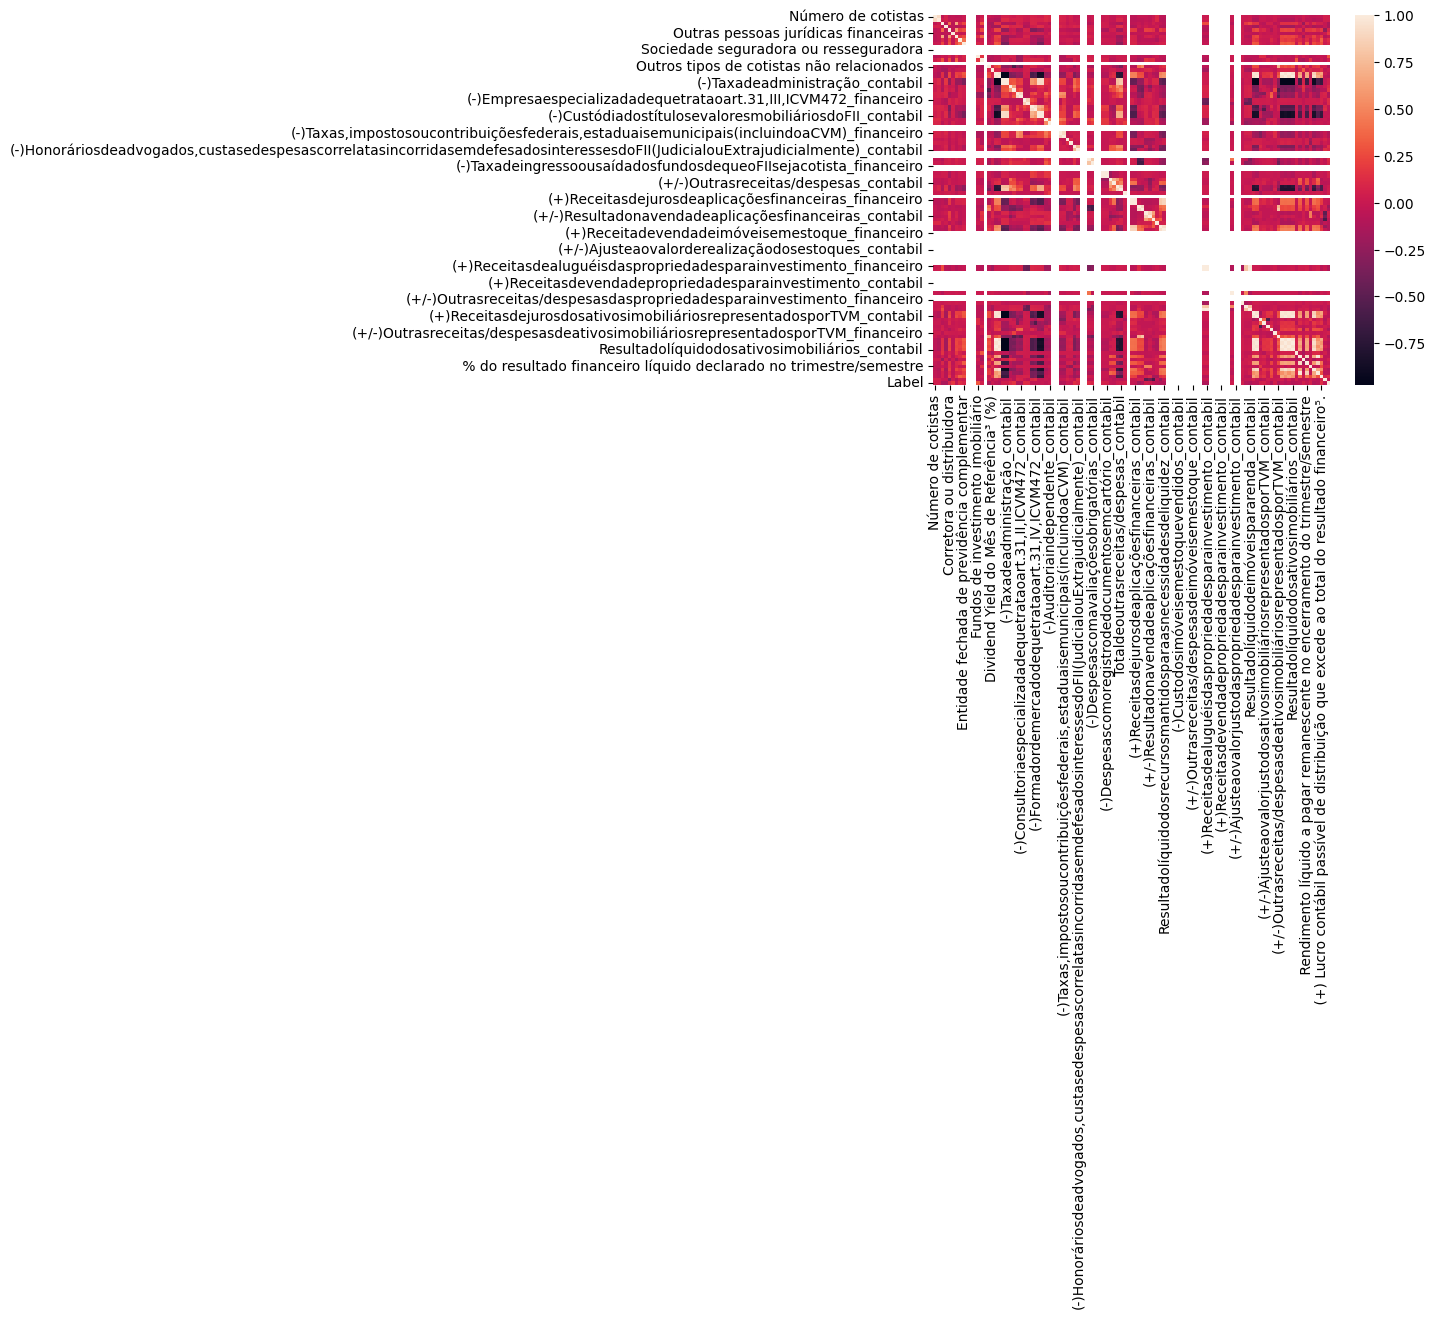

In [197]:
corr = final.corr('pearson')
sns.heatmap(data=corr)

Tentando ver as variaveis que mais interefem no label

In [ ]:
corr['Label'].describe()

count    82.000000
mean      0.005560
std       0.142975
min      -0.201316
25%      -0.082834
50%      -0.012749
75%       0.051873
max       1.000000
Name: Label, dtype: float64

In [200]:
corr.loc[(corr['Label'] < -0.3) | (corr['Label'] > 0.3)]['Label']

Fundos de investimento imobiliário    0.302358
Label                                 1.000000
Name: Label, dtype: float64

In [201]:
interval = [final['Label'].min(),final['Label'].quantile(.33),final['Label'].quantile(.66),final['Label'].max()]
labels = ['low_risk','medium_risk','hight_risk']

<Axes: xlabel='Label', ylabel='Count'>

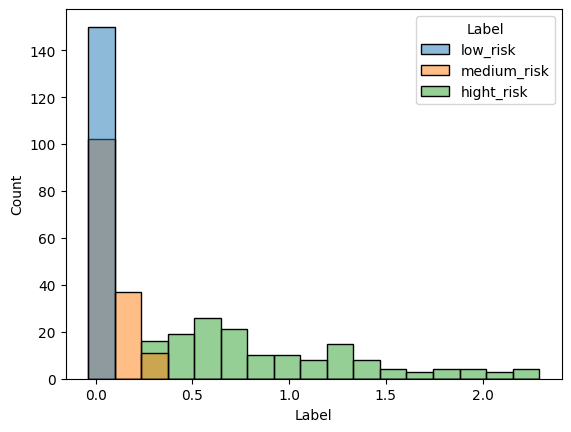

In [202]:
hue = pd.cut(final['Label'],bins=interval,labels=labels)
sns.histplot(x=final['Label'], hue=hue)

In [203]:
final['label'] = hue

/tmp/ipykernel_3305/3281018354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['label'] = hue


### RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

final =final.dropna()
# Carregando um dataset de exemplo
X = final.drop(columns=['label'])
y = final['label']

# Definindo o modelo base (pode ser qualquer estimador com coef_ ou feature_importances_)
modelo = LogisticRegression(max_iter=200)

# Criando o RFE - selecionando 2 features
rfe = RFE(estimator=modelo, n_features_to_select=15)

# Fitando o RFE nos dados
rfe.fit(X, y)

# Verificando as features selecionadas
print("Features selecionadas:", rfe.support_)
print("Ranking das features:", rfe.ranking_)


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Features selecionadas: [False False False False False False False False False False False False
 False False False False False False  True False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False  True  True  True  True False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False  True False  True False False
 False  True False  True  True False False False False  True False False
 False False False]
Ranking das features: [57 55 56 65 64 60 63 67 66 94 96 95 62 59 97 58 68  3  1 19 17 18  1 30
 37 42 44 43 41 33 35 46 49 92 93 25 28 45 48 36 38 69 71 50 51 70 77 52
 53 21  1 32 20 54 91  1  1  1  1 29 40  4 39  1  2 72 74 90 89 88 87 86
 85 84 83 23 24 76 82 81 80 79 78 34 73 75 47 27 26  1  6  

/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [205]:
dict_rfe = {}
for i in range(len(rfe.support_)):
    dict_rfe[final.columns[i]] = int(rfe.ranking_[i])
dict_rfe

{'Número de cotistas': 57,
 'Pessoa física': 55,
 'Pessoa jurídica não financeira': 56,
 'Banco comercial': 65,
 'Corretora ou distribuidora': 64,
 'Outras pessoas jurídicas financeiras': 60,
 'Investidores não residentes': 63,
 'Entidade aberta de previdência complementar': 67,
 'Entidade fechada de previdência complementar': 66,
 'Regime próprio de previdência dos servidores públicos': 94,
 'Sociedade seguradora ou resseguradora': 96,
 'Sociedade de capitalização e de arrendamento mercantil': 95,
 'Fundos de investimento imobiliário': 62,
 'Outros fundos de investimento': 59,
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)': 97,
 'Outros tipos de cotistas não relacionados': 58,
 'Dividend Yield do Mês de Referência³ (%)': 68,
 'Resultadocontábil/financeirotrimestrallíquido_financeiro': 3,
 'Resultadocontábil/financeirotrimestrallíquido_contabil': 1,
 '(-)Taxadeadministração_financeiro': 19,
 '(-)Taxadeadministração_contabil': 17,
 '(-)Taxadedesempenho(performan

In [206]:
dict(sorted(dict_rfe.items(), key=lambda item: item[1]))

{'Resultadocontábil/financeirotrimestrallíquido_contabil': 1,
 '(-)Taxadedesempenho(performance)_contabil': 1,
 '(+/-)Outrasreceitas/despesas_contabil': 1,
 '(+)Receitasdejurosdeaplicaçõesfinanceiras_financeiro': 1,
 '(+)Receitasdejurosdeaplicaçõesfinanceiras_contabil': 1,
 '(+/-)Ajusteaovalorjustodeaplicaçõesfinanceiras_financeiro': 1,
 '(+/-)Ajusteaovalorjustodeaplicaçõesfinanceiras_contabil': 1,
 'Resultadolíquidodosrecursosmantidosparaasnecessidadesdeliquidez_financeiro': 1,
 '(+)ReceitasdejurosdosativosimobiliáriosrepresentadosporTVM_financeiro': 1,
 '(+/-)AjusteaovalorjustodosativosimobiliáriosrepresentadosporTVM_financeiro': 1,
 '(+)ResultadonavendadeativosimobiliáriosrepresentadosporTVM_financeiro': 1,
 'ResultadolíquidodeativosimobiliáriosrepresentadosporTVM_financeiro': 1,
 'Resultadolíquidodosativosimobiliários_financeiro': 1,
 'Resultadolíquidodosativosimobiliários_contabil': 1,
 ' % do resultado financeiro líquido declarado no trimestre/semestre': 1,
 'Resultadolíquidodosr

### Discretizar os Dados

In [207]:
discretized = pd.DataFrame()
for colum in final.columns:
    if colum != 'label':
        discretized[colum] = pd.qcut(final[colum],q=6, duplicates='drop')
discretized['label'] = final['label']
discretized

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label,label
0,"(27.076, 62.306]","(11.927, 31.627]","(44.333, 175.0]","(-0.001, 2.0]","(-0.001, 2.0]","(-0.001, 57.0]","(1.0, 7.0]","(-0.001, 1.0]","(-0.001, 5.0]",NaN,...,"(-0.001, 121256149.333]","(-51413515.333, 0.0]","(-45.001, 0.0]","(-0.001, 793150.0]","(-1287441.001, 11837010.667]","(-0.001, 112451601.333]","(-0.001, 1819251.333]","(-236522852.001, 0.0]","(0.0487, 0.321]",medium_risk
1,"(27.076, 62.306]","(-0.001, 3.712]","(-0.001, 5.0]","(-0.001, 2.0]","(-0.001, 2.0]","(-0.001, 57.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",NaN,...,"(-0.001, 121256149.333]","(-51413515.333, 0.0]","(-45.001, 0.0]","(-0.001, 793150.0]","(-1287441.001, 11837010.667]","(-0.001, 112451601.333]","(-0.001, 1819251.333]","(-236522852.001, 0.0]","(0.00608, 0.0487]",medium_risk
2,"(27.076, 62.306]","(-0.001, 3.712]","(-0.001, 5.0]","(-0.001, 2.0]","(-0.001, 2.0]","(-0.001, 57.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",NaN,...,"(-0.001, 121256149.333]","(-51413515.333, 0.0]","(-45.001, 0.0]","(-0.001, 793150.0]","(-1287441.001, 11837010.667]","(-0.001, 112451601.333]","(-0.001, 1819251.333]","(-236522852.001, 0.0]","(0.0487, 0.321]",medium_risk
3,"(27.076, 62.306]","(11.927, 31.627]","(44.333, 175.0]","(-0.001, 2.0]","(-0.001, 2.0]","(-0.001, 57.0]","(1.0, 7.0]","(-0.001, 1.0]","(-0.001, 5.0]",NaN,...,"(11775182156.0, 29279852724.0]","(-1709021173.333, -596769436.0]","(1327915247.0, 5999950905.0]","(974711.0, 1000000.0]","(1144418224.667, 2494550688.333]","(14119858702.0, 29076538007.667]","(-0.001, 1819251.333]","(-236522852.001, 0.0]","(0.321, 0.743]",hight_risk
4,"(27.076, 62.306]","(-0.001, 3.712]","(-0.001, 5.0]","(-0.001, 2.0]","(-0.001, 2.0]","(-0.001, 57.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",NaN,...,"(11775182156.0, 29279852724.0]","(-1709021173.333, -596769436.0]","(1327915247.0, 5999950905.0]","(974711.0, 1000000.0]","(1144418224.667, 2494550688.333]","(14119858702.0, 29076538007.667]","(-0.001, 1819251.333]","(-236522852.001, 0.0]","(0.00608, 0.0487]",medium_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,"(27.076, 62.306]","(31.627, 956.0]","(15.0, 44.333]","(-0.001, 2.0]","(-0.001, 2.0]","(-0.001, 57.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",NaN,...,"(100648536695.0, 1062597405635.0]","(-51413515.333, 0.0]","(31337255175.0, 246239076605.0]","(793150.0, 974711.0]","(400991391.0, 1144418224.667]","(29076538007.667, 102386609385.0]","(-0.001, 1819251.333]","(-236522852.001, 0.0]","(0.0487, 0.321]",medium_risk
667,"(12.357, 27.076]","(11.927, 31.627]","(15.0, 44.333]","(-0.001, 2.0]","(-0.001, 2.0]","(-0.001, 57.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5.0]",NaN,...,"(2560920025.0, 11775182156.0]","(-51413515.333, 0.0]","(1327915247.0, 5999950905.0]","(974711.0, 1000000.0]","(400991391.0, 1144418224.667]","(3131010101.333, 14119858702.0]","(-0.001, 1819251.333]","(-236522852.001, 0.0]","(0.00608, 0.0487]",medium_risk
669,"(12.357, 27.076]","(11.927, 31.627]","(15.0, 44.333]","(-0.001, 2.0]","(-0.001, 2.0]","(-0.001, 57.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 5

In [208]:
from sklearn.preprocessing import MinMaxScaler

normalized = pd.DataFrame()
scaler = MinMaxScaler()

for col in final.columns:
    if col != 'label':
        normalized[col] = scaler.fit_transform(final[[col]]).flatten()
    else:
        normalized[col] = final[col]  # mantém o label
normalized

/tmp/ipykernel_3305/1398479016.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
/tmp/ipykernel_3305/1398479016.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
/tmp/ipykernel_3305/1398479016.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label,label
0,0.030382,0.031464,0.262857,0.0,0.0,0.070175,0.714286,0.0,0.0,0.0,...,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,0.051153,medium_risk
1,0.029983,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,0.025011,medium_risk
2,0.029645,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,0.093401,medium_risk
3,0.028106,0.029183,0.274286,0.0,0.0,0.000000,0.857143,0.0,0.0,0.0,...,0.015609,0.994691,1.073794e-02,0.041736,0.129682,0.016228,0.0,1.0,0.274079,hight_risk
4,0.028387,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.015609,0.994691,1.073794e-02,0.041736,0.129682,0.016228,0.0,1.0,0.032789,medium_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.035393,0.036508,0.222857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.097685,0.999974,1.461994e-01,0.040792,0.083075,0.103915,0.0,1.0,0.071869,hight_risk
451,0.025728,0.026812,0.222857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.007856,0.999976,8.315678e-03,0.042298,0.064453,0.008059,0.0,1.0,0.026038,hight_risk
452,0.023146,0.024227,0.194286,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.007856,0.999976,8.315678e-03,0.042298,0.064453,0.008059,0.0,1.0,0.101010,hight_risk
453,0.014620,0.015684,0.142857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.002450,0.999997,6.918983e-03,0.040236,0.021200,0.002643,0.0,1.0,0.018213,hight_risk


# SVM

Separar treinamento teste

In [211]:
from sklearn.model_selection import train_test_split
normalized = normalized.dropna()
X = normalized.drop(columns=['label'])
y = normalized['label']
X = X.loc[:,rfe.support_]
# Separação: 70% treino, 30% teste (pode ajustar o test_size se quiser)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

normalized

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label,label
0,0.030382,0.031464,0.262857,0.0,0.0,0.070175,0.714286,0.0,0.0,0.0,...,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,0.051153,medium_risk
1,0.029983,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,0.025011,medium_risk
2,0.029645,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,0.093401,medium_risk
3,0.028106,0.029183,0.274286,0.0,0.0,0.000000,0.857143,0.0,0.0,0.0,...,0.015609,0.994691,1.073794e-02,0.041736,0.129682,0.016228,0.0,1.0,0.274079,hight_risk
4,0.028387,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.015609,0.994691,1.073794e-02,0.041736,0.129682,0.016228,0.0,1.0,0.032789,medium_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.035393,0.036508,0.222857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.097685,0.999974,1.461994e-01,0.040792,0.083075,0.103915,0.0,1.0,0.071869,hight_risk
451,0.025728,0.026812,0.222857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.007856,0.999976,8.315678e-03,0.042298,0.064453,0.008059,0.0,1.0,0.026038,hight_risk
452,0.023146,0.024227,0.194286,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.007856,0.999976,8.315678e-03,0.042298,0.064453,0.008059,0.0,1.0,0.101010,hight_risk
453,0.014620,0.015684,0.142857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.002450,0.999997,6.918983e-03,0.040236,0.021200,0.002643,0.0,1.0,0.018213,hight_risk


In [215]:
from sklearn.svm import SVC
cs = [.5,1,10]
kernels = ['poly','rbf']
for c in cs:
    for kernel in kernels:
        svc = SVC(kernel=kernel,C=c,probability=True, decision_function_shape='ovo', random_state=0)
        svc.fit(X=X_train,y=y_train)
        y_predict = svc.predict(X=X_test)
        print(f'C:{c}, kernel: {kernel}')
        # print(f'Acuracia: {accuracy_score(y_true=y_test,y_pred=y_predict)}')
        print(confusion_matrix(y_true=y_test,y_pred=y_predict))
        print(classification_report(y_test, y_predict))
        print('------------------------------------------------------')
        
        


C:0.5, kernel: poly
[[28  0 11]
 [ 3  4 16]
 [ 7  2 22]]
              precision    recall  f1-score   support

  hight_risk       0.74      0.72      0.73        39
    low_risk       0.67      0.17      0.28        23
 medium_risk       0.45      0.71      0.55        31

    accuracy                           0.58        93
   macro avg       0.62      0.53      0.52        93
weighted avg       0.62      0.58      0.56        93

------------------------------------------------------
C:0.5, kernel: rbf
[[37  0  2]
 [20  0  3]
 [23  0  8]]
              precision    recall  f1-score   support

  hight_risk       0.46      0.95      0.62        39
    low_risk       0.00      0.00      0.00        23
 medium_risk       0.62      0.26      0.36        31

    accuracy                           0.48        93
   macro avg       0.36      0.40      0.33        93
weighted avg       0.40      0.48      0.38        93

------------------------------------------------------
C:1, kernel: po

/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

C:10, kernel: rbf
[[28  1 10]
 [ 4  9 10]
 [ 8  3 20]]
              precision    recall  f1-score   support

  hight_risk       0.70      0.72      0.71        39
    low_risk       0.69      0.39      0.50        23
 medium_risk       0.50      0.65      0.56        31

    accuracy                           0.61        93
   macro avg       0.63      0.58      0.59        93
weighted avg       0.63      0.61      0.61        93

------------------------------------------------------


In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Normalização dos dados
normalized = pd.DataFrame()
scaler = MinMaxScaler()

for col in final.columns:
    if col != 'label':
        normalized[col] = scaler.fit_transform(final[[col]]).flatten()
    else:
        normalized[col] = final[col]  # mantém o label

# Removendo NaN
normalized = normalized.dropna()

# Separação de X e y
X = normalized.drop(columns=['label'])
y = normalized['label']

# Aplicando RFE para seleção de features
modelo = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=modelo, n_features_to_select=15)
rfe.fit(X, y)

# Filtrando as features selecionadas
X = X.loc[:, rfe.support_]

# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
n_estimators = (10, 100, 1000)
for n_estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_estimator, random_state=0)
    rf.fit(X_train, y_train)
    y_predict_rf = rf.predict(X_test)

    # Avaliação do modelo Random Forest
    print(f"Random Forest (n_estimators={n_estimator}) - Matriz de Confusão:")
    print(confusion_matrix(y_test, y_predict_rf))

    print("\nRandom Forest - Acurácia:")
    print(accuracy_score(y_test, y_predict_rf))

    print("\nRandom Forest - Relatório de Classificação:")
    print(classification_report(y_test, y_predict_rf))
# Aplicando Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)

# Avaliação do modelo Random Forest
print("Random Forest - Matriz de Confusão:")
print(confusion_matrix(y_test, y_predict_rf))

print("\nRandom Forest - Acurácia:")
print(accuracy_score(y_test, y_predict_rf))

print("\nRandom Forest - Relatório de Classificação:")
print(classification_report(y_test, y_predict_rf))


/tmp/ipykernel_3305/1108217912.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
/tmp/ipykernel_3305/1108217912.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
/tmp/ipykernel_3305/1108217912.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

Random Forest (n_estimators=10) - Matriz de Confusão:
[[27  1 11]
 [ 1 17  5]
 [12  7 12]]

Random Forest - Acurácia:
0.6021505376344086

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.68      0.69      0.68        39
    low_risk       0.68      0.74      0.71        23
 medium_risk       0.43      0.39      0.41        31

    accuracy                           0.60        93
   macro avg       0.59      0.61      0.60        93
weighted avg       0.59      0.60      0.60        93

Random Forest (n_estimators=100) - Matriz de Confusão:
[[28  1 10]
 [ 1 19  3]
 [12  8 11]]

Random Forest - Acurácia:
0.6236559139784946

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.68      0.72      0.70        39
    low_risk       0.68      0.83      0.75        23
 medium_risk       0.46      0.35      0.40        31

    accuracy                        

# RNA

In [219]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# Modelo com duas camadas intermediárias utilizando ReLU.
model_relu = Sequential([
    Dense(64, input_dim=15),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(3),
    Activation('softmax')
])

model_relu.compile(optimizer=Adam(learning_rate=0.001), 
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

model_relu.summary()


2025-04-13 16:22:10.934693: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-13 16:22:10.943345: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-13 16:22:10.959111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744572130.993885    3305 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744572131.001801    3305 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744572131.030330    3305 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,203 (12.51 KB)

 Trainable params: 3,203 (12.51 KB)

 Non-trainable params: 0 (0.00 B)

In [225]:
X_train.dtypes
# y_train.dtypes

Número de cotistas                                                                                       float64
Banco comercial                                                                                          float64
Entidade aberta de previdência complementar                                                              float64
Fundos de investimento imobiliário                                                                       float64
(-)Consultoriaespecializadadequetrataoart.31,II,ICVM472_financeiro                                       float64
(-)Consultoriaespecializadadequetrataoart.31,II,ICVM472_contabil                                         float64
(-)Empresaespecializadadequetrataoart.31,III,ICVM472_financeiro                                          float64
(-)CustódiadostítulosevaloresmobiliáriosdoFII_financeiro                                                 float64
(-)ComissõeseemolumentospagossobreasoperaçõesdoFII_contabil                                     

In [ ]:
# Convert categorical labels to one-hot encoding
y_train_encoded = tf.keras.utils.to_categorical(y_train.cat.codes, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test.cat.codes, num_classes=3)

# Train the model
model_relu.fit(X_train, y_train_encoded, epochs=10, batch_size=32)

# Avaliação do modelo
y_predict_relu = model_relu.predict(X_test)
y_predict_relu = tf.argmax(y_predict_relu, axis=1)
y_test_decoded = tf.argmax(y_test_encoded, axis=1)



Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5017 - loss: 0.9758
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4907 - loss: 0.9771
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5705 - loss: 0.9418
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5494 - loss: 0.9470
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5462 - loss: 0.9459 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5488 - loss: 0.9472 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5333 - loss: 0.9432
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5383 - loss: 0.9147
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5358 - loss: 0.9226
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4893 - loss: 0.9242
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Modelo ReLU - Matriz de Confusão:
[[ 3 17  3]
 [ 2 22  7]
 [ 0 13 26]]
              precision    recall  f1-score   support

     

In [228]:
print("Modelo ReLU - Matriz de Confusão:")
print(confusion_matrix(y_test_decoded, y_predict_relu))
print(classification_report(y_test_decoded, y_predict_relu))

Modelo ReLU - Matriz de Confusão:
[[ 3 17  3]
 [ 2 22  7]
 [ 0 13 26]]
              precision    recall  f1-score   support

           0       0.60      0.13      0.21        23
           1       0.42      0.71      0.53        31
           2       0.72      0.67      0.69        39

    accuracy                           0.55        93
   macro avg       0.58      0.50      0.48        93
weighted avg       0.59      0.55      0.52        93

